## S12 T01: Pipelines, grid search i text mining

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

*I will use a dataset about NYC Student demographic and enrollment data by district in 2019-20.*

In [90]:
df = pd.read_csv('/Users/Diana/Downloads/2019-20_Demograhic_Snapshot_-_District.csv')

In [91]:
df.head()

,Administrative District,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
0,1,2015-16,12009,842,905,912,899,858,849,904,...,0.027,2065,0.172,2577,0.215,1092,0.091,7556,0.629,0.606
1,1,2016-17,11772,827,850,907,889,859,834,808,...,0.031,2059,0.175,2555,0.217,1065,0.090,7265,0.617,0.597
2,1,2017-18,11632,800,851,846,854,862,839,813,...,0.035,2022,0.174,2528,0.217,1016,0.087,7682,0.660,0.670
3,1,2018-19,11376,759,799,850,816,838,839,832,...,0.038,2045,0.180,2597,0.228,966,0.085,7314,0.643,0.661
4,1,2019-20,11506,960,812,782,848,813,818,831,...,0.050,2056,0.179,2550,0.222,918,0.080,7291,0.634,0.671


In [92]:
df = df.drop_duplicates()

In [93]:
#As I'm only interested in 2019-2020 I will filter the dataframe

df = df[(df.Year == "2019-20")]

In [94]:
df.head()

,Administrative District,Year,Total Enrollment,Grade 3K+PK (Half Day & Full Day),Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5,...,% Multiple Race Categories Not Represented,# White,% White,# Students with Disabilities,% Students with Disabilities,# English Language Learners,% English Language Learners,# Poverty,% Poverty,Economic Need Index
4,1,2019-20,11506,960,812,782,848,813,818,831,...,0.050,2056,0.179,2550,0.222,918,0.080,7291,0.634,0.671
9,2,2019-20,62820,2966,3128,2896,2978,2772,2712,2667,...,0.050,16983,0.270,10903,0.174,4645,0.074,32232,0.513,0.528
14,3,2019-20,22564,1386,1384,1300,1243,1334,1369,1345,...,0.067,7443,0.330,4112,0.182,954,0.042,10300,0.456,0.490
19,4,2019-20,13004,1473,759,781,758,823,884,996,...,0.043,633,0.049,3062,0.235,1187,0.091,10392,0.799,0.834
24,5,2019-20,10947,1566,590,581,601,654,714,774,...,0.039,654,0.060,2633,0.241,835,0.076,8752,0.799,0.828


In [95]:
df.columns

Index(['Administrative District', 'Year', 'Total Enrollment',
       'Grade 3K+PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12', '# Female', '% Female',
       '# Male', '% Male', '# Asian', '% Asian', '# Black', '% Black',
       '# Hispanic', '% Hispanic',
       '# Multiple Race Categories Not Represented',
       '% Multiple Race Categories Not Represented', '# White', '% White',
       '# Students with Disabilities', '% Students with Disabilities',
       '# English Language Learners', '% English Language Learners',
       '# Poverty', '% Poverty', 'Economic Need Index'],
      dtype='object')

In [96]:
#dropping the columns that don't add relevant information
df = df.drop(['Year','Grade 3K+PK (Half Day & Full Day)', 'Grade K', 'Grade 1', 'Grade 2',
       'Grade 3', 'Grade 4', 'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8',
       'Grade 9', 'Grade 10', 'Grade 11', 'Grade 12','% Female','% Male','% Asian','% Black','% Hispanic',
       '% Multiple Race Categories Not Represented','% White','% Students with Disabilities','% English Language Learners',
       '% Poverty'], axis=1)

In [97]:
df.columns

Index(['Administrative District', 'Total Enrollment', '# Female', '# Male',
       '# Asian', '# Black', '# Hispanic',
       '# Multiple Race Categories Not Represented', '# White',
       '# Students with Disabilities', '# English Language Learners',
       '# Poverty', 'Economic Need Index'],
      dtype='object')

In [98]:
#checking null values

df.isnull().sum()

Administrative District                       0
Total Enrollment                              0
# Female                                      0
# Male                                        0
# Asian                                       0
# Black                                       0
# Hispanic                                    0
# Multiple Race Categories Not Represented    0
# White                                       0
# Students with Disabilities                  0
# English Language Learners                   0
# Poverty                                     0
Economic Need Index                           0
dtype: int64

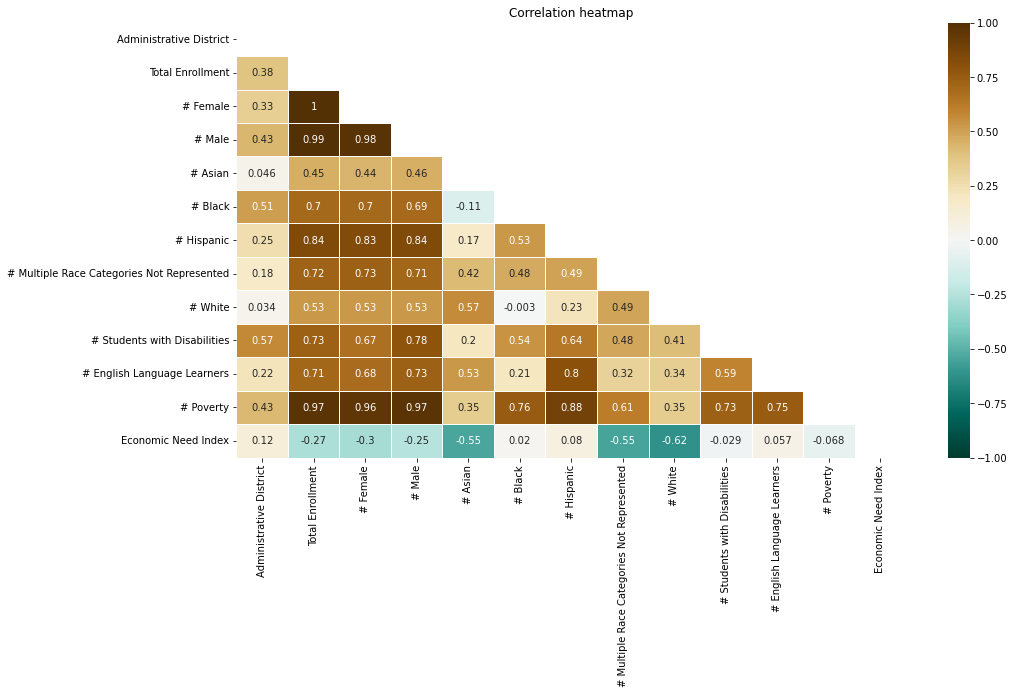

In [99]:
#visualize the correlation between variables

correl=df.corr().round(3)
mascara=np.triu(correl)
f, ax=plt.subplots(figsize=(15, 8))
sns.heatmap(correl, mask=mascara, annot=True, linewidths=.5,  vmin=-1, vmax=1,  cmap='BrBG_r')
ax.set_title('Correlation heatmap')
plt.show()

In [100]:
df.corr()

,Administrative District,Total Enrollment,# Female,# Male,# Asian,# Black,# Hispanic,# Multiple Race Categories Not Represented,# White,# Students with Disabilities,# English Language Learners,# Poverty,Economic Need Index
Administrative District,1.000000,0.383506,0.333678,0.431335,0.046245,0.512144,0.253030,0.177636,0.033826,0.573060,0.220198,0.429487,0.117266
Total Enrollment,0.383506,1.000000,0.995506,0.995208,0.453553,0.698917,0.838569,0.724471,0.529459,0.728380,0.709407,0.970063,-0.274314
# Female,0.333678,0.995506,1.000000,0.981476,0.443020,0.703368,0.831996,0.734339,0.525496,0.670102,0.679518,0.960107,-0.296111
# Male,0.431335,0.995208,0.981476,1.000000,0.460151,0.687729,0.837446,0.707450,0.528556,0.781681,0.733575,0.971194,-0.249221
# Asian,0.046245,0.453553,0.443020,0.460151,1.000000,-0.113743,0.175018,0.420414,0.569908,0.203785,0.528473,0.346920,-0.546310
# Black,0.512144,0.698917,0.703368,0.687729,-0.113743,1.000000,0.530274,0.475879,-0.003246,0.543641,0.208258,0.756574,0.020170
# Hispanic,0.253030,0.838569,0.831996,0.837446,0.175018,0.530274,1.000000,0.495364,0.224816,0.635780,0.798520,0.883872,0.080353
# Multiple Race Categories Not Represented,0.177636,0.724471,0.734339,0.707450,0.420414,0.475879,0.495364,1.000000,0.487889,0.481573,0.314793,0.612575,-0.548738
# White,0.033826,0.529459,0.525496,0.528556,0.569908,-0.003246,0.224816,0.487889,1.000000,0.412151,0.335512,0.350626,-0.617844
# Students with Disabilities,0.573060,0.728380,0.670102,0.781681,0.203785,0.543641,0.635780,0.481573,0.412151,1.000000,0.588883,0.730387,-0.029256


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [102]:
X = df.drop(['# Poverty'],axis=1) 
y = df['# Poverty']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [104]:
#steps for pipeline: scaling and RF
steps = [('scaler', StandardScaler()), ('RF', RandomForestRegressor())]

#pipline instance
pipeline = Pipeline(steps)

#### GridSearch

Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

In [145]:
#defining parameters for RF
parameteres = {'RF__n_estimators':[10,20,30,40,50,100], 'RF__max_depth':[1,5,10]}

#gridSearch
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('RF', RandomForestRegressor())]),
             param_grid={'RF__max_depth': [1, 5, 10],
                         'RF__n_estimators': [10, 20, 30, 40, 50, 100]})

In [146]:
print("score = %3.2f" %(grid.score(X_test,y_test)))
print(grid.best_params_)

score = 0.94
{'RF__max_depth': 5, 'RF__n_estimators': 20}


In [147]:
#creating the best model possible with values given by grid.best_params_
model = Pipeline(steps=[('scaler', StandardScaler()),
                       ('RF', RandomForestRegressor(max_depth=10,n_estimators=10))])
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('RF', RandomForestRegressor(max_depth=10, n_estimators=10))])

In [148]:
#prediction values

pred = model.predict(X_test)

print('predicted response:', pred, sep='\n')

predicted response:
[29736.5 12818.7 27867.5 25786.5  9417.7 28113.9 38951.2]


In [149]:
df_rf=pd.DataFrame({'Actual':y_test, 'Predicted':pred})
df_rf.head()

,Actual,Predicted
134,33840,29736.5
69,13038,12818.7
124,26713,27867.5
109,24030,25786.5
79,5320,9417.7


### Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [152]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('punkt', quiet=True)

True

In [161]:
text = open('/Users/Diana/Documents/IT Academy/Data Science/Gentrified.txt').read()

In [162]:
#tokenize the text into sentences

tokenized_text=sent_tokenize(text)
print(tokenized_text)

['In my forties, I began spending winters in New Orleans, a city I deeply loved.', 'I had started to see how my life could look different.', 'Easier, and calmer.', 'I did not want to grow old in New York.', 'I had been young there, and that was enough.', 'In 2016, I bought a small house in New Orleans.', 'The next winter, the Williamsburg apartment building was sold for fifty-six million dollars.', 'There had been whispers it had been up for sale for months, or years, even.', 'The new owners were reportedly connected with Jared Kushner, who was rumored to be one of the worst landlords in the city, employing aggressive tactics to intimidate or evict longtime tenants.', 'Almost immediately, people lawyered up.', 'Cameras were installed all over the building.', 'Eviction notices were posted on doors.', 'And yet, still, nothing that needed to be fixed was fixed.', 'People moved out—either kicked out or bought out—and rents got higher.', 'Everyone was stressed and anxious, all the time.', '

In [164]:
#word tokenization

tokenized_word=word_tokenize(text)
print(tokenized_word)

['In', 'my', 'forties', ',', 'I', 'began', 'spending', 'winters', 'in', 'New', 'Orleans', ',', 'a', 'city', 'I', 'deeply', 'loved', '.', 'I', 'had', 'started', 'to', 'see', 'how', 'my', 'life', 'could', 'look', 'different', '.', 'Easier', ',', 'and', 'calmer', '.', 'I', 'did', 'not', 'want', 'to', 'grow', 'old', 'in', 'New', 'York', '.', 'I', 'had', 'been', 'young', 'there', ',', 'and', 'that', 'was', 'enough', '.', 'In', '2016', ',', 'I', 'bought', 'a', 'small', 'house', 'in', 'New', 'Orleans', '.', 'The', 'next', 'winter', ',', 'the', 'Williamsburg', 'apartment', 'building', 'was', 'sold', 'for', 'fifty-six', 'million', 'dollars', '.', 'There', 'had', 'been', 'whispers', 'it', 'had', 'been', 'up', 'for', 'sale', 'for', 'months', ',', 'or', 'years', ',', 'even', '.', 'The', 'new', 'owners', 'were', 'reportedly', 'connected', 'with', 'Jared', 'Kushner', ',', 'who', 'was', 'rumored', 'to', 'be', 'one', 'of', 'the', 'worst', 'landlords', 'in', 'the', 'city', ',', 'employing', 'aggressive

In [165]:
#Frequency Distribution

from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 149 samples and 255 outcomes>


In [166]:
fdist.most_common(2)

[('.', 18), (',', 17)]

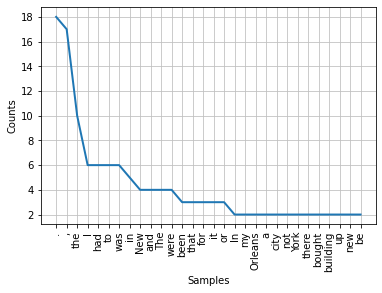

In [167]:
# Frequency Distribution Plot

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

### Nivell 2
### Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [173]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'that', 'down', 'our', 'weren', 'yourselves', 'these', 'no', 'been', 'after', 'or', 'was', 'very', "won't", 'herself', 'then', 'only', 'what', 'haven', 'its', 'of', 'can', 'themselves', 'is', 're', "it's", 'against', "she's", 'my', 'o', 'shan', 'ourselves', "weren't", 'did', "you'll", 'more', 'nor', 'll', 'here', 'were', 'by', 'ma', 'i', "doesn't", 'ain', 'she', "shouldn't", 'about', 'just', 'you', 'having', 'over', "hasn't", 'where', "wasn't", "you'd", 'in', 'but', 'at', 'before', "wouldn't", 'up', "should've", 'it', 't', 'while', 'theirs', 'same', 'because', "hadn't", 'the', 'so', 's', 'off', 'on', 'am', "that'll", 'whom', 'most', 'under', 'them', 'wasn', "mightn't", 'doesn', "don't", 'again', 'being', 'had', 'will', 'both', 'does', 'until', 'those', "aren't", 'how', 'now', 'each', 'to', 'isn', 'during', 'myself', 'when', 'their', "haven't", 'has', 'some', 'between', 'below', 'won', 'hers', 'and', 'd', 'his', 'any', 'such', "you've", 'don', 'as', 'with', 'above', 'than', 'too', 'its

In [176]:
#removing stopwords

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
        
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['In', 'my', 'forties', ',', 'I', 'began', 'spending', 'winters', 'in', 'New', 'Orleans', ',', 'a', 'city', 'I', 'deeply', 'loved', '.', 'I', 'had', 'started', 'to', 'see', 'how', 'my', 'life', 'could', 'look', 'different', '.', 'Easier', ',', 'and', 'calmer', '.', 'I', 'did', 'not', 'want', 'to', 'grow', 'old', 'in', 'New', 'York', '.', 'I', 'had', 'been', 'young', 'there', ',', 'and', 'that', 'was', 'enough', '.', 'In', '2016', ',', 'I', 'bought', 'a', 'small', 'house', 'in', 'New', 'Orleans', '.', 'The', 'next', 'winter', ',', 'the', 'Williamsburg', 'apartment', 'building', 'was', 'sold', 'for', 'fifty-six', 'million', 'dollars', '.', 'There', 'had', 'been', 'whispers', 'it', 'had', 'been', 'up', 'for', 'sale', 'for', 'months', ',', 'or', 'years', ',', 'even', '.', 'The', 'new', 'owners', 'were', 'reportedly', 'connected', 'with', 'Jared', 'Kushner', ',', 'who', 'was', 'rumored', 'to', 'be', 'one', 'of', 'the', 'worst', 'landlords', 'in', 'the', 'city', ',', 'emp

#### Stemming

Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.

In [177]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['In', 'forties', ',', 'I', 'began', 'spending', 'winters', 'New', 'Orleans', ',', 'city', 'I', 'deeply', 'loved', '.', 'I', 'started', 'see', 'life', 'could', 'look', 'different', '.', 'Easier', ',', 'calmer', '.', 'I', 'want', 'grow', 'old', 'New', 'York', '.', 'I', 'young', ',', 'enough', '.', 'In', '2016', ',', 'I', 'bought', 'small', 'house', 'New', 'Orleans', '.', 'The', 'next', 'winter', ',', 'Williamsburg', 'apartment', 'building', 'sold', 'fifty-six', 'million', 'dollars', '.', 'There', 'whispers', 'sale', 'months', ',', 'years', ',', 'even', '.', 'The', 'new', 'owners', 'reportedly', 'connected', 'Jared', 'Kushner', ',', 'rumored', 'one', 'worst', 'landlords', 'city', ',', 'employing', 'aggressive', 'tactics', 'intimidate', 'evict', 'longtime', 'tenants', '.', 'Almost', 'immediately', ',', 'people', 'lawyered', '.', 'Cameras', 'installed', 'building', '.', 'Eviction', 'notices', 'posted', 'doors', '.', 'And', 'yet', ',', 'still', ',', 'nothing', 'needed', '

### Nivell 3. Exercici 1

Realitza sentiment analysis al teu conjunt de dades.

In [202]:
data = pd.read_csv('/Users/Diana/Downloads/training.1600000.processed.noemoticon.csv', encoding='latin1')

In [203]:
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [209]:
#dataset

data_columns = ["sentiment", "ids", "date", "flag", "user", "text"]

In [210]:
#text cleaning

text_cleaning_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [211]:
data = pd.read_csv('/Users/Diana/Downloads/training.1600000.processed.noemoticon.csv', encoding='latin1', names=data_columns)

In [212]:
data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [213]:
data.columns

Index(['sentiment', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [214]:
data = data.drop(['ids','flag','user'], axis=1)

In [215]:
data.sentiment.value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

Where 0 is negative and 4 is positive.

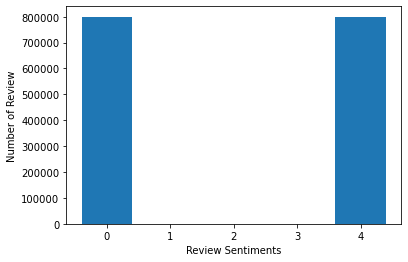

In [217]:
sentiment_count=data.groupby('sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [221]:
#tokenizer to remove unwanted elements from out data like symbols and numbers

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+")

#countVectorizer to generate document term matrix

cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['text'])

In [224]:
#train and test
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.3, random_state=42)

In [225]:
#Model Building and Evaluation

from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6128833333333333


We got a classification rate of 61,2% using CountVector, which is not considered as good accuracy. We need to improve this.

In [227]:
#Feature Generation using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['text'])

In [228]:
#Split train and test set (TF-IDF)

X_train, X_test, y_train, y_test = train_test_split(text_tf, data['sentiment'], test_size=0.3, random_state=42)

In [229]:
#Model Building and Evaluation (TF-IDF)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.77279375


We've improved accuracy to 77.2%.